In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as msno
import matplotlib.pyplot as plt
from datetime import date
today = date.today()
from tqdm import tqdm
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import sklearn
from wordcloud import WordCloud
import string
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
import pyLDAvis
import pyLDAvis.sklearn
import gensim
from itertools import combinations
from sklearn.tree import DecisionTreeClassifier
from util import *
import joblib

C:\Users\jerom\anaconda3\envs\PROJET5\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [ ]:
#Lecture du Fichier
#df = pd.read_csv('posts_after_prepocessing.csv', sep = ',', encoding='UTF-8')

In [2]:
#Deserialisation de mon Dataframe traité côté Preprocessing
import pickle
with open('df_afterPreprocessing.pickle', 'rb') as file:
    df = pickle.load(file)

In [3]:
#Préprocessing du champ Tittle et Body
df['TitleBody'] = df['TitleBody'].map(lambda x: BeautifulSoup(x, "html.parser").get_text())
df['TitleBody'] = df['TitleBody'].map(lambda x: x.replace('\n', ' '))
df['TitleBody'] = df['TitleBody'].map(lambda x: x.replace(':', ''))

punct = string.punctuation
for c in punct:
    if c != '#':
        df['TitleBody'] = df['TitleBody'].map(lambda x: x.replace(c, ''))

#Parsing avec NLTK
df['TitleBody_final'] = df.apply(lambda row: nltk.word_tokenize(row['TitleBody'],language='english'), axis=1)

#Supression des StopWord
df['TitleBody_final'] = df.apply(lambda row:removeStopWord(row['TitleBody_final']), axis=1)

#Lemmatisation
#df['TitleBody_final'] = df.apply(lambda row:lemmatisation(row['TitleBody_final']), axis=1)

#Traitement du C#
df['TitleBody_final'] = df.apply(lambda row:processCSharp(row['TitleBody_final']), axis=1)

#Suppressin des numériques
df['TitleBody_final'] = df.apply(lambda row:removeOnlyNumeric(row['TitleBody_final']), axis=1)

In [4]:
#Suppression des tags similaires
df['processed_tags_final2'] = df.apply(lambda row:removeTagSimilaire(row['processed_tags_final']), axis=1)

In [5]:
df.head(20)

Id                                               BODY  \
0      12051  <p>if i inherit from a base class and want to ...   
1   17319422  <p>i am using pycharm on windows and want to c...   
2      32664  <p>can anyone tell me if there is a way with g...   
3    8763125  <p>i would like to get the keys of a javascrip...   
5      33923  <p>whilst starting to learn lisp, i've come ac...   
6      33969  <p>we're experimenting with various ways to th...   
7      33978  <p>how would you go about finding out how much...   
8      33207  <p>what frameworks exist to unit test objectiv...   
9      32899  <p>i have some kind of test data and want to c...   
10     33746  <p>at work we are being asked to create xml fi...   
11  26076054  <p>i have a design that implements a dark blue...   
12     13049  <p>what's the difference between struct and cl...   
13     15142  <p>what are the advantages/disadvantages of ke...   
14   8773299  <p>i know how to use the <code>v</code> comman...   
15     34413  <p>i am getting a <code>noclassdeffounderror</...   
16  17330160  <p>i would like to understand how the built-in...   
17     53569  <p>what is the best way to get a log of commit...   
18     53609  <p>i hope this qualifies as a programming ques...   
19     53664  <p>i've started using vim to develop perl scri...   
20  43707076  <p>i want to make the navigation bar stick to ...   

                                                Title  \
0                  calling the base constructor in c#   
1    how do i set the maximum line length in pycharm?   
2   is there a constraint that restricts my generi...   
3                          get array of object's keys   
5                             what is tail recursion?   
6   best way to implement request throttling in as...   
7   find out how much memory is being used by an o...   
8   what is the best way to unit test objective-c ...   
9   how do you generate dynamic (parameterized) un...   
10                       xml attribute vs xml element   
11         changing placeholder text color with swift   
12  what's the difference between struct and class...   
13  what are the pros and cons to keeping sql in s...   
14     how to cut an entire line in vim and paste it?   
15   why am i getting a noclassdeffounderror in java?   
16   how does the @property decorator work in python?   
17          how to get the changes on a branch in git   
18                       what does 'foo' really mean?   
19  how to effectively work with multiple files in...   
20    how does the "position: sticky;" property work?   

                                                 Tags         CreationDate  \
0                <c#><.net><inheritance><constructor>  2008-08-15 07:39:23   
1                             <python><pycharm><pep8>  2013-06-26 12:00:31   
2                         <c#><generics><constraints>  2008-08-28 16:04:49   
3                          <javascript><ecmascript-5>  2012-01-06 19:12:38   
5   <algorithm><language-agnostic><functional-prog...  2008-08-29 03:48:03   
6                           <asp.net-mvc><throttling>  2008-08-29 04:50:50   
7             <python><performance><memory-profiling>  2008-08-29 04:59:31   
8           <objective-c><cocoa><unit-testing><xcode>  2008-08-28 19:41:30   
9     <python><unit-testing><parameterized-unit-test>  2008-08-28 17:49:02   
10                                         <xml><xsd>  2008-08-29 01:15:52   
11                                <ios><swift><uikit>  2014-09-27 15:10:34   
12  <.net><class><struct><value-type><reference-type>  2008-08-16 08:21:47   
13           <c#><sql><sql-server><stored-procedures>  2008-08-18 19:54:39   
14                                              <vim>  2012-01-07 21:35:33   
15                       <java><noclassdeffounderror>  2008-08-29 14:59:30   
16  <python><properties><decorator><python-decorat...  2013-06-26 20:47:15   
17                                      <git><branch>  2008-09-10 07:44:53   


In [5]:
#Utilisation de la librairie MultilabelBinarize pour créer un matrice de Tags
from sklearn.preprocessing import MultiLabelBinarizer

tags = df["processed_tags_final2"]

mlb = MultiLabelBinarizer()
tags_mlb = mlb.fit_transform(df["processed_tags_final2"].to_numpy())

In [105]:
#Serialisation avec JOBLIB
joblib.dump(mlb,"multiLabel.pickle")

['multiLabel.pickle']

## Création du jeu d'entrainement et du jeu de test 

In [6]:
from sklearn.model_selection import train_test_split

X = df['TitleBody_final']
y = tags_mlb

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.25)

## Vectorisation avec TF-IDF

In [7]:
vectorizer = TfidfVectorizer(tokenizer=dummy,preprocessor=dummy,
                            max_features=12000)
vectorizer.fit(X_train)
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

C:\Users\jerom\anaconda3\envs\PROJET5\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
#Serialisation de la vectorisation
pickle.dump(vectorizer, open('vectorizer.pickle', 'wb')) #Saving DF

In [108]:
#Serialisation avec JOBLIB
joblib.dump(vectorizer,"vectorizer.pickle")

['vectorizer.pickle']

In [34]:
X_train_vec.shape

(11378, 12000)

## Modèle Naive Bayse après TF_IDF
* Utilisation de la méthode OneVsRest qui calcule toutes les étiquettes de sortie (Attention aux performances car n modèles suivant les tags de sortie)
* J'utilise les données après un TF_IDF

In [7]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB

nb_clf = OneVsRestClassifier(MultinomialNB(fit_prior=True, 
                                           class_prior=None))
nb_clf.fit(X_train_vec, y_train)

OneVsRestClassifier(estimator=MultinomialNB())

In [8]:
y_pred_nb = nb_clf.predict(X_test_vec)
print_score(y_test, y_pred_nb)

Hamming loss : 0.01577643026627999
Subset Accuracy :  0.04323754284207751
F1-score :  0.08445532435740516
Jaccard :  0.044089456869009586


## Modèle Arbre de décision après NMF (Comme réduction de dimension)

In [9]:
#D'abord réalisation d'une NMF avec le paramètre optimum calculté précédemment (8 Topics)
from sklearn.decomposition import NMF
k = 8
# create the model, specifiying the initialization strategy and the number of topics to produce
model = NMF(n_components=k,init="nndsvd",random_state=42,max_iter = 300) 
# apply the model and extract the two factor matrices
W_train = model.fit_transform(X_train_vec)
W_test = model.fit_transform(X_test_vec)

In [10]:
#Arbre de décision
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(W_train, y_train)

DecisionTreeClassifier(random_state=0)

In [11]:
y_pred_nb = clf.predict(W_test)
print_score(y_test, y_pred_nb)

Hamming loss : 0.030925388874242024
Subset Accuracy :  0.04007382019509623
F1-score :  0.11257376305038584
Jaccard :  0.059644059644059645


## Modèle Arbre de décision après TF-IDF

In [8]:
#Arbre de décision
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_vec, y_train)

DecisionTreeClassifier(random_state=42)

In [9]:
y_pred_nb = clf.predict(X_test_vec)
print_score(y_test, y_pred_nb)

Hamming loss : 0.013658866545763461
Subset Accuracy :  0.31558133403638283
F1-score :  0.5661111581084511
Jaccard :  0.39480825958702065


In [106]:
#Serialisation du modele
pickle.dump(clf, open('decisionTreeClassifier.pickle', 'wb')) #Saving DF

In [107]:
#Serialisation avec JOBLIB
joblib.dump(clf,"decisionTreeClassifier.pickle")

['decisionTreeClassifier.pickle']

In [91]:
res = clf.predict(X_test_vec[0])

In [100]:
mlb.inverse_transform(res)

[('sql',)]

## Modèle Arbre de décision après TruncateSVD
* Contrairement à l'ACP TruncateSVD supporte les matrices creuses

In [14]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=1000, n_iter=7, random_state=42)
svd.fit(X_train_vec)
X_train_SVD = svd.transform(X_train_vec)
X_test_SVD = svd.transform(X_test_vec)

#Arbre de décision
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_SVD, y_train)

DecisionTreeClassifier(random_state=42)

In [15]:
y_pred_nb = clf.predict(X_test_SVD)
print_score(y_test, y_pred_nb)

Hamming loss : 0.021523859741629316
Subset Accuracy :  0.16530450830477195
F1-score :  0.35031036129237625
Jaccard :  0.21234925229136517


In [ ]:
X_train_vec.shape

## Modèle Arbre de décision après ACP

In [16]:
from sklearn import decomposition
# choix du nombre de composantes à calculer
n_comp = 50

features = df.columns

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp,random_state=42)
pca.fit(X_train_vec.toarray())
X_train_PCA = pca.transform(X_train_vec.toarray())
X_test_PCA = pca.transform(X_test_vec.toarray())

#Arbre de décision
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_PCA, y_train)

DecisionTreeClassifier(random_state=42)

In [17]:
y_pred_nb = clf.predict(X_test_PCA)
print_score(y_test, y_pred_nb)

Hamming loss : 0.02165568151858687
Subset Accuracy :  0.16293171631953599
F1-score :  0.3483021263091083
Jaccard :  0.2108752041502546


In [13]:
mlb.classes_

array(['.net', 'ajax', 'algorithm', 'android', 'android-studio',
       'angular', 'arrays', 'asp.net', 'bash', 'branch', 'c', 'c#', 'c++',
       'class', 'cocoa-touch', 'collections', 'command-line', 'css',
       'database', 'dataframe', 'date', 'debugging', 'dictionary',
       'django', 'docker', 'dom', 'eclipse', 'exception', 'file', 'forms',
       'function', 'generics', 'git', 'go', 'google-chrome', 'html',
       'http', 'intellij-idea', 'ios', 'iphone', 'java', 'javascript',
       'jquery', 'json', 'language-agnostic', 'linq', 'linux', 'list',
       'loops', 'macos', 'matplotlib', 'mongodb', 'multithreading',
       'mysql', 'node.js', 'npm', 'numpy', 'object', 'objective-c', 'oop',
       'pandas', 'performance', 'php', 'postgresql', 'python', 'r',
       'reactjs', 'regex', 'rest', 'ruby', 'ruby-on-rails', 'security',
       'shell', 'sorting', 'sql', 'sql-server', 'string', 'swift',
       'syntax', 'tsql', 'twitter-bootstrap', 'typescript',
       'unit-testing', 'unix

In [12]:
#Fonction qui compte les bonnes prédictions et les mauvaises prédictions par tags
def scoreTags():
    resultat = []
    for index, word in enumerate(mlb.classes_):
        GoodPrediction = 0
        BadPrediction = 0
        GoodNegative = 0
        BadNegative = 0
        for i in range(0,len(y_test)):
            if (y_test[i][index] == 1):
                if (y_test[i][index] == y_pred_nb[i][index]):
                    GoodPrediction += 1
                else:
                    BadPrediction +=1
            else :
                if (y_test[i][index] == y_pred_nb[i][index]):
                    GoodNegative += 1
                else:
                    BadNegative +=1
        resultat.append([word,GoodPrediction,BadPrediction,GoodNegative,BadNegative])
    return resultat

In [13]:
comptagePrediction = scoreTags()
comptagePrediction = sorted(comptagePrediction, key=lambda prediction: prediction[1],reverse=True)

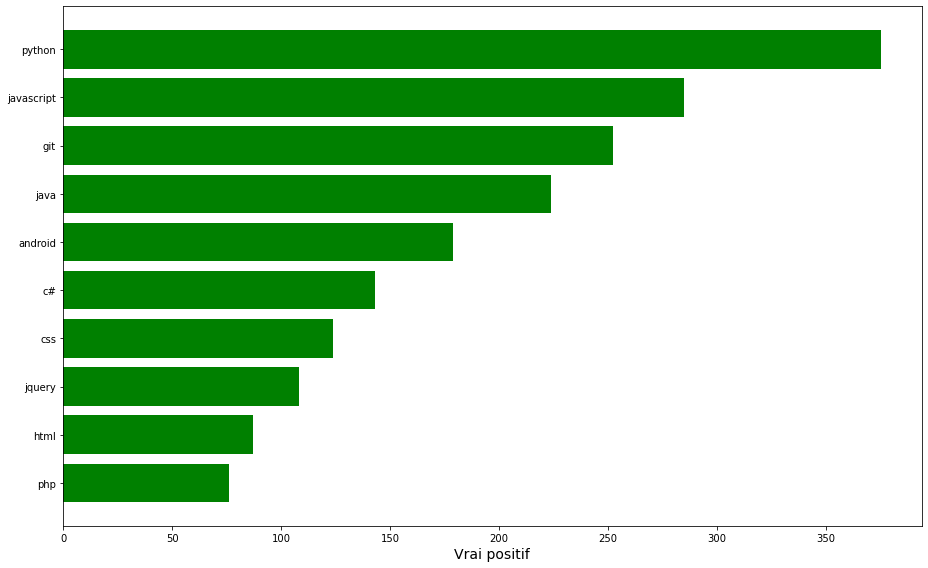

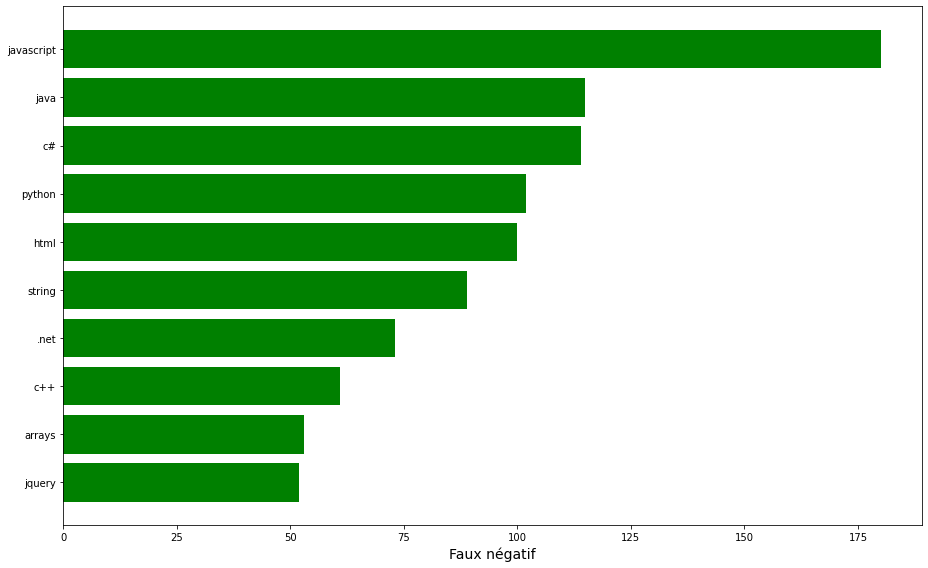

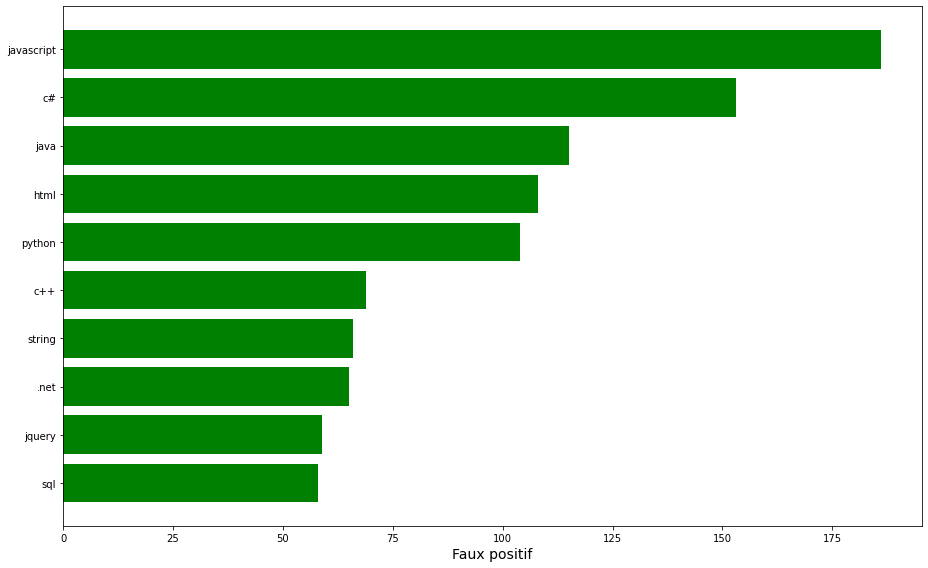

In [16]:
def plot_top_term(comptage,indice,titre):
    top = 10
    trieTerme = []
    # get the top terms and their weights
    trieTerme = sorted(comptagePrediction, key=lambda prediction: prediction[indice],reverse=True)
    top_terms = []
    top_weights = []
    for term_index in trieTerme[0:top]:
        top_terms.append( term_index[0] )
        top_weights.append( term_index[indice] )
    top_terms.reverse()
    top_weights.reverse()
    fig = plt.figure(figsize=(13,8))
    # add the horizontal bar chart
    ypos = np.arange(len(top_terms))
    ax = plt.barh(ypos, top_weights, align="center", color="green",tick_label=top_terms)
    plt.xlabel(titre,fontsize=14)
    plt.tight_layout()
    plt.show()
    
plot_top_term(comptagePrediction,1,'Vrai positif')
plot_top_term(comptagePrediction,2,'Faux négatif')
plot_top_term(comptagePrediction,4,'Faux positif')